In [188]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
import geopandas as gpd

In [189]:
map_df = gpd.read_file('districtes.geojson').filter(items=['NOM', 'geometry'])

In [190]:
display(map_df)
map_df.columns

,NOM,geometry
0,Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,Eixample,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,Sants-Montjuïc,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,Les Corts,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,Gràcia,"POLYGON ((2.13629 41.42363, 2.13640 41.42358, ..."
6,Horta-Guinardó,"POLYGON ((2.15949 41.44977, 2.15942 41.44960, ..."
7,Nou Barris,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,Sant Andreu,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,Sant Martí,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


Index(['NOM', 'geometry'], dtype='object')

In [191]:
unemployment_df

,Number
District Name,
Ciutat Vella,6826
Eixample,9883
Gràcia,4781
Horta-Guinardó,7972
Les Corts,2823
No consta,7
Nou Barris,10065
Sant Andreu,7306
Sant Martí,11694


In [192]:
unemployment_df = pd.read_csv('unemployment.csv')
unemployment_df = unemployment_df[unemployment_df["Demand_occupation"] == "Registered unemployed"]
unemployment_df = unemployment_df[unemployment_df['Year'] == 2017]
unemployment_df = unemployment_df[unemployment_df['Month'] == "December"]
unemployment_df = unemployment_df.groupby('District Name').sum().head(50)
unemployment_df = unemployment_df.filter(items=["Number"])
map_df = map_df.set_index('NOM').join(unemployment_df)

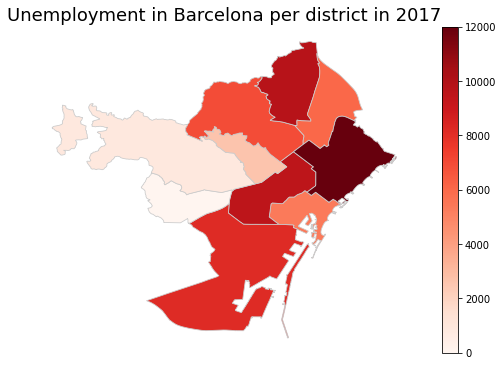

In [194]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number'

# set the range for the choropleth
vmin, vmax = 0, 12000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
map_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# add a title
ax.set_title('Unemployment in Barcelona per district in 2017', fontdict={'fontsize': '18', 'fontweight' : '3'})


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
